# Secondhand Car Price Prediction 



#### **Overview:**

The second-hand car market has seen tremendous growth, with consumers increasingly turning to pre-owned vehicles as a more affordable option compared to new cars. However, one of the major challenges in this market is determining the **accurate price** of a second-hand car, given the numerous variables that can influence the price, such as the car’s brand, model, age, mileage, condition, and location. Buyers and sellers often struggle to come to a fair price, leading to inefficiencies in the market.

This project aims to develop a **predictive model** that estimates the price of a second-hand car based on various **input features**, using machine learning techniques. The goal is to help buyers, sellers, and dealerships make informed decisions by accurately predicting the fair market price of used vehicles.

#### **Problem Statement:**

Develop a **machine learning model** to predict the **price** of a second-hand car based on the following factors:

- **Car Make**: The brand or manufacturer of the car.
- **Model**: The specific model or variant of the car.
- **Year of Manufacture**: The year the car was manufactured.
- **Mileage**: The number of kilometers the car has been driven.
- **Fuel Type**: The type of fuel the car uses (e.g., Petrol, Diesel, Electric).
- **Engine Size**: The engine displacement (usually in liters).
- **Transmission**: The type of transmission (e.g., Automatic, Manual).
- **Color**: The color of the car.
- **Number of Previous Owners**: The number of previous owners.
- **Location**: The region or city where the car is being sold.
- **Condition**: The physical and mechanical condition of the car.
- **Additional Features**: Any special features or upgrades (e.g., sunroof, leather seats).

The model should be able to accurately predict the **price** of the car, taking into account the interplay of these factors. The project will involve **data collection**, **data preprocessing**, **model building**, and **evaluation** using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

#### **Objectives:**

1. **Data Collection**: Gather a comprehensive dataset that includes various features influencing the second-hand car prices.
2. **Data Preprocessing**: Clean the data by handling missing values, encoding categorical variables, and scaling numerical values as needed.
3. **Model Development**: Develop machine learning models (e.g., **Multiple Linear Regression**, **Decision Trees**, **XGBoost**) to predict car prices.
4. **Model Evaluation**: Evaluate the performance of different models based on accuracy, interpretability, and efficiency.
5. **Deployment**: Develop a model deployment plan, making the model accessible to end-users for real-time price predictions via an API or web application.

#### **Expected Outcome:**

The project will deliver a **predictive model** capable of estimating the price of a second-hand car based on input features, which can help buyers and sellers make better pricing decisions. Additionally, the project will contribute to understanding the impact of various features on car pricing and could be extended into a commercial product or service for the used car market.

---


In [18]:
import pandas as pd # for data analysis and manipulation also for loading the dataset
import numpy as np # for mathematical and scientific calculations
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for advanced data visualization 

In [24]:
df =pd.read_csv("C:\\Users\\irosh\\Downloads\\second hand car price\\cars.csv")  #loading the dataset using pandas read_csv function

In [26]:
df.head() # displaying first 5 rows of the dataset

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [28]:
df.info() # fetching the information of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [30]:
df.describe() # obtaining basic statistical summary of numerical columns 

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [32]:
df.describe(include = 'all') # if you use include ='all', it includes all the columns in the dataset irrepective of their data type. 

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,100.000000,100,100,100.00000,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02
unique,NaN,11,58,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Mustang,NaN,NaN,Petrol,Automatic,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,3,NaN,NaN,52,57,44,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,NaN,2018.39000,28150.000000,NaN,NaN,NaN,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,NaN,NaN,1.17116,9121.375716,NaN,NaN,NaN,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,NaN,NaN,2016.00000,10000.000000,NaN,NaN,NaN,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,NaN,NaN,2017.75000,22000.000000,NaN,NaN,NaN,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,NaN,NaN,2018.00000,27000.000000,NaN,NaN,NaN,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,NaN,NaN,2019.00000,32000.000000,NaN,NaN,NaN,19.000000,2143.000000,187.000000,5.000000,2.500000e+06


# Exploratory Data Analysis 

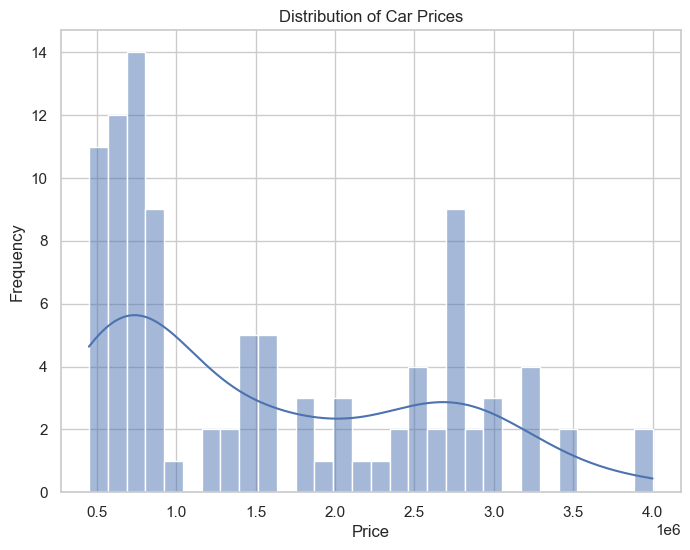

In [225]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


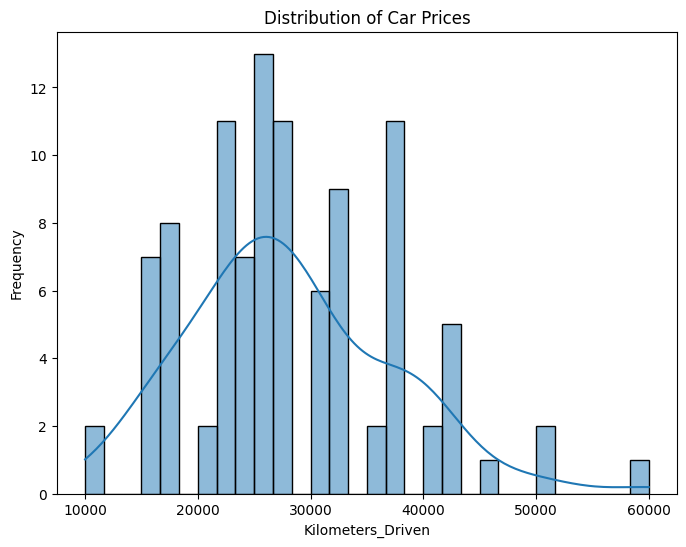

In [93]:
# Kilometer_driven distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Kilometers_Driven'], kde=True, bins=30)
plt.title("Distribution of Kilometers_Driven")
plt.xlabel("Kilometers_Driven")
plt.ylabel("Frequency")
plt.show()


<Figure size 1200x600 with 0 Axes>

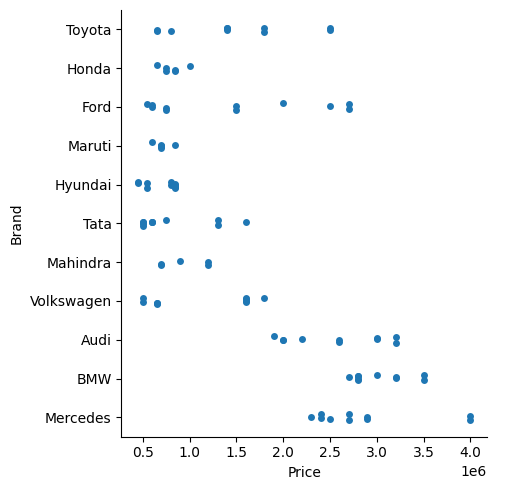

In [97]:
plt.figure(figsize=(12,6))
sns.catplot(data=df, x="Price", y="Brand")


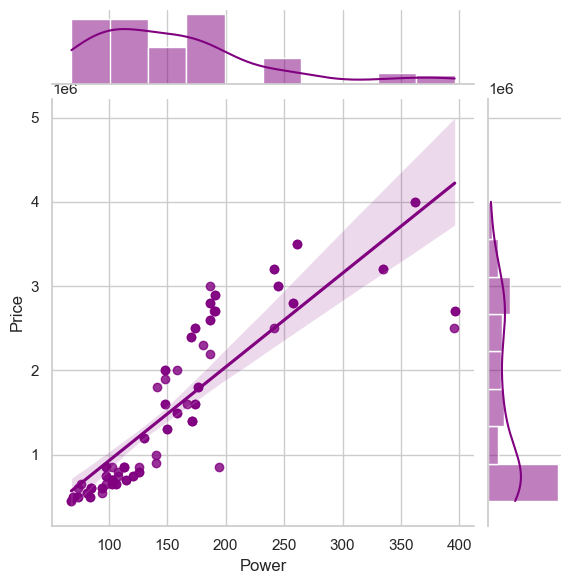

In [107]:
# Jointplot: Power vs. Price
sns.jointplot(x='Power', y='Price', data=df, kind='reg', color='purple')
plt.show()


C:\Users\irosh\AppData\Local\Temp\ipykernel_7976\3177712172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Owner_Type', y='Price', data=df, palette='muted')


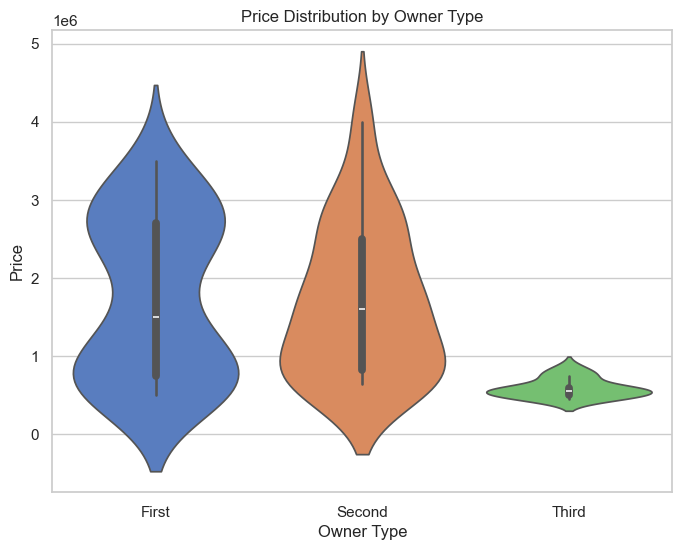

In [117]:
# Violin plot: Price by Owner_Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='Owner_Type', y='Price', data=df, palette='muted')
plt.title("Price Distribution by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Price")
plt.show()


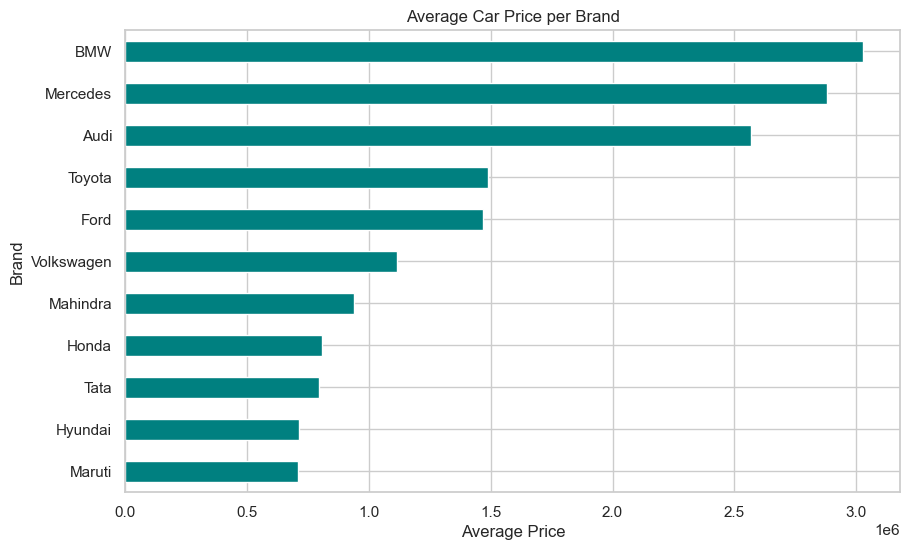

In [119]:
# Average price per brand
avg_price_per_brand = df.groupby('Brand')['Price'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
avg_price_per_brand.plot(kind='barh', color='teal')
plt.title("Average Car Price per Brand")
plt.xlabel("Average Price")
plt.ylabel("Brand")
plt.show()


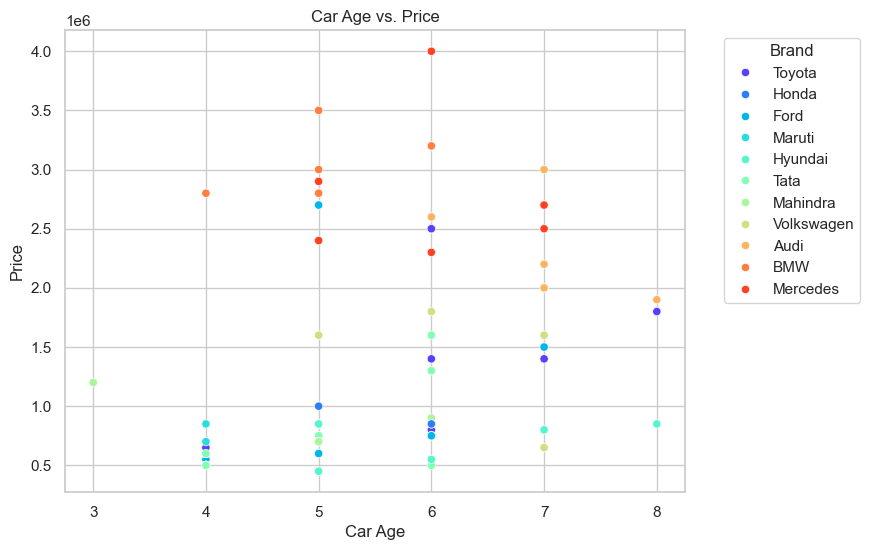

In [121]:
# Adding Car Age to the dataframe
df['Car_Age'] = 2024 - df['Year']

# Car Age vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Car_Age', y='Price', data=df, hue='Brand', palette='rainbow')
plt.title("Car Age vs. Price")
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [109]:
df.corr

<bound method DataFrame.corr of     Car_ID     Brand          Model  Year  Kilometers_Driven Fuel_Type  \
0        1    Toyota        Corolla  2018              50000    Petrol   
1        2     Honda          Civic  2019              40000    Petrol   
2        3      Ford        Mustang  2017              20000    Petrol   
3        4    Maruti          Swift  2020              30000    Diesel   
4        5   Hyundai         Sonata  2016              60000    Diesel   
..     ...       ...            ...   ...                ...       ...   
95      96  Mercedes        C-Class  2019              22000    Diesel   
96      97    Toyota  Innova Crysta  2017              38000    Diesel   
97      98      Ford       EcoSport  2018              26000    Petrol   
98      99   Hyundai          Verna  2019              24000    Petrol   
99     100      Tata         Altroz  2020              18000    Petrol   

   Transmission Owner_Type  Mileage  Engine  Power  Seats    Price  
0        M

C:\Users\irosh\AppData\Local\Temp\ipykernel_7976\135577816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set3')


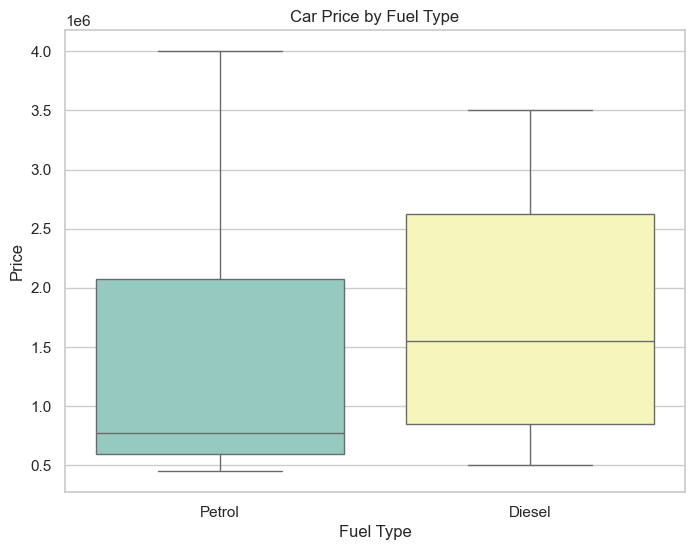

C:\Users\irosh\AppData\Local\Temp\ipykernel_7976\135577816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price', data=df, palette='Set2')


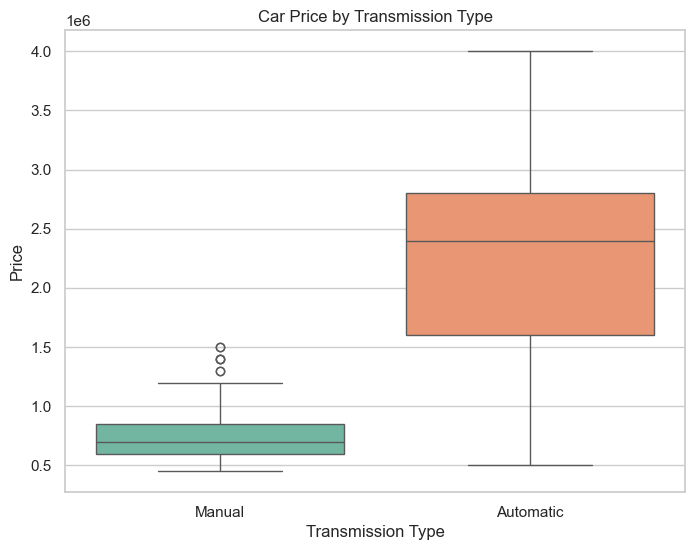

In [125]:
# Boxplot: Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set3')
plt.title("Car Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

# Boxplot: Price by Transmission
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price', data=df, palette='Set2')
plt.title("Car Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()


In [136]:
from sklearn.preprocessing import LabelEncoder # label Encoding: for converting categorical data to numerical data
 
cat_col =["Brand", "Model", "Fuel_Type", "Transmission", "Owner_Type"] # creating a list of all categorical columns (make sure this list only contains categorical columns)

#Initializing Label Encoder
le= LabelEncoder()

# applying label encoding on the dataset using fit_transform method
for col in cat_col:
    df[col] = le.fit_transform(df[col])


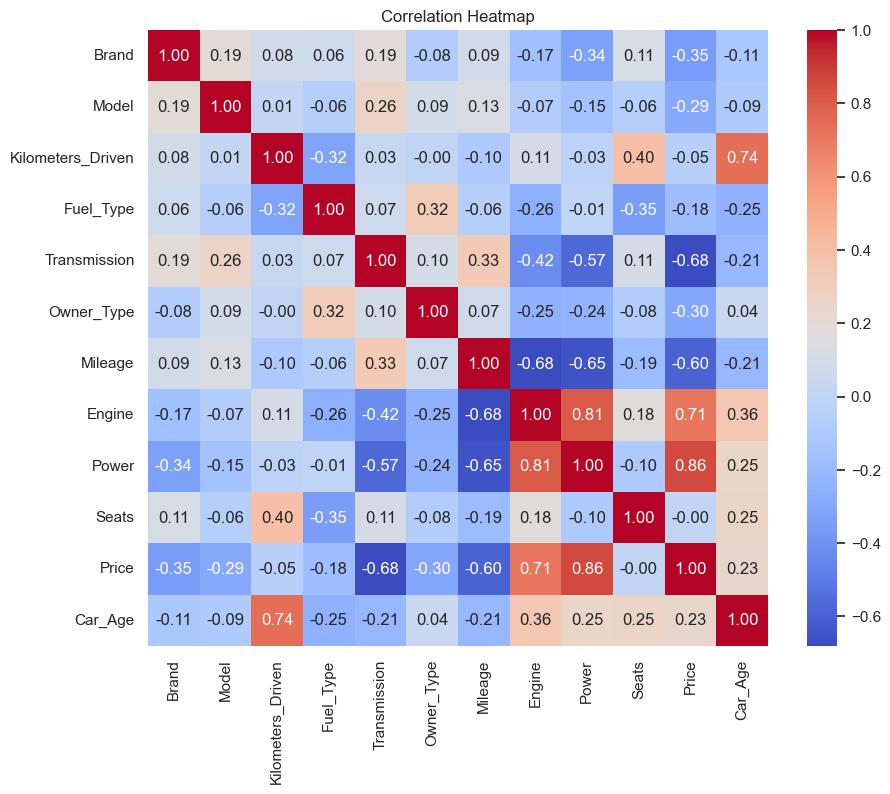

In [243]:


# Correlation matrix
corr_matrix = df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



---

### **1. Skewness**
Skewness measures the **asymmetry** of a distribution. It can indicate whether the data is symmetric, or skewed to the left or right:

- **Skewness = 0:** Perfectly symmetric distribution (e.g., normal distribution).  
- **Positive Skewness ( > 0):** The tail on the right side is longer, and the bulk of data is concentrated on the left.  
- **Negative Skewness ( < 0):** The tail on the left side is longer, and the bulk of data is concentrated on the right.

#### **Interpretation of Skewness**:
- **Price (0.605):** Slightly positively skewed, meaning most car prices are concentrated in the lower range with fewer high-priced cars.
- **Kilometers_Driven (0.612):** Slight positive skew, indicating that most cars have low mileage, with some having very high mileage.
- **Mileage (0.367):** Very slight positive skew, meaning mileage data is almost symmetric but leans slightly towards lower values.
- **Engine (1.529):** Strongly positively skewed, showing that smaller engine sizes dominate, with fewer larger engines.
- **Power (1.412):** Strong positive skew, meaning most vehicles have lower power ratings, with a few high-power outliers.

---

### **2. Kurtosis**
Kurtosis measures the **tailedness** of a distribution, describing the presence of extreme values or outliers.

- **Kurtosis = 3:** Mesokurtic, typical of a normal distribution.  
- **Kurtosis > 3:** Leptokurtic, with heavy tails and more extreme values (outliers).  
- **Kurtosis < 3:** Platykurtic, with lighter tails and fewer extreme values.

#### **Interpretation of Kurtosis**:
- **Price (-0.954):** Platykurtic, meaning the distribution is flat and has fewer extreme price values (less outliers).
- **Kilometers_Driven (0.592):** Slightly platykurtic, showing fewer extreme mileage values.
- **Mileage (-0.109):** Close to normal but slightly platykurtic, suggesting fewer outliers in mileage values.
- **Engine (4.324):** Leptokurtic, indicating heavy tails and significant outliers in engine size (e.g., rare very large engines).
- **Power (1.815):** Close to normal but somewhat leptokurtic, suggesting some extreme values in power.

---

### **Summary of Insights**
1. **Skewness Analysis**:
   - Price, Kilometers_Driven, Mileage: These are slightly skewed, with most data values in lower ranges and few high-value outliers.
   - Engine and Power: Highly skewed, suggesting outliers (e.g., rare large engines or high-power vehicles).

2. **Kurtosis Analysis**:
   - Price, Kilometers_Driven, Mileage: These distributions are flat, with fewer extreme values.
   - Engine: Strongly leptokurtic, indicating significant outliers (e.g., premium or performance engines).
   - Power: Shows some degree of outliers in high-power vehicles.

### **Actionable Steps**
- **Transformations**: For features with high skewness (e.g., Engine, Power), apply transformations (log, square root) to reduce skewness and normalize the data.
- **Outlier Detection**: Focus on leptokurtic features (e.g., Engine, Power) to identify and handle extreme values, as they may distort modeling.
- **Feature Engineering**: Consider normalizing or scaling features like Engine and Power for better model performance.



In [148]:
from scipy.stats import skew, kurtosis 

# Skewness and kurtosis for numerical features
for column in ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']:
    print(f"{column}: Skewness={skew(df[column])}, Kurtosis={kurtosis(df[column])}")


Price: Skewness=0.6050329812494293, Kurtosis=-0.9538555671076092
Kilometers_Driven: Skewness=0.6119028972373494, Kurtosis=0.5923528930215927
Mileage: Skewness=0.3669713346017744, Kurtosis=-0.10892284732938906
Engine: Skewness=1.5293251242735928, Kurtosis=4.3242695833017315
Power: Skewness=1.4116898837107796, Kurtosis=1.8147746369059359



### **1. What is a Z-Score?**
- The **Z-score** is a way to measure how far a data point is from the **mean** of a dataset, in terms of standard deviations.
- Formula for Z-score:
  
  $Z = frac{X - mu}{sigma}$
  
  
  Where:
   - $(X)$: The data point  
  - \(\mu\): Mean of the dataset  
  - \(\sigma\): Standard deviation of the dataset  

- **Interpretation**:
  - A Z-score of 0 means the data point is exactly at the mean.
  - A Z-score of 1 or -1 means the data point is 1 standard deviation above or below the mean.
  - Z-scores farther from 0 (like 3 or -3) suggest the data point is far from the mean and might be an **outlier**.

---

### **Steps**

1. **Calculate Z-Scores for Specific Columns**:
   ```python
   from scipy.stats import zscore
   
   # Calculate Z-scores for specific columns
   z_scores = df[['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']].apply(zscore)
   ```

   - For each column (`Price`, `Kilometers_Driven`, etc.), the Z-score is calculated for all data points.
   - This results in a new DataFrame `z_scores` where each value represents the Z-score for that data point.

---

2. **Identify Outliers**:
   ```python
   # Identify rows where any column's Z-score is greater than 3
   outliers = (z_scores.abs() > 3).any(axis=1)
   ```

   - `z_scores.abs()` converts all Z-scores to their absolute values (ignores whether they're positive or negative).
   - A value is considered an **outlier** if its Z-score is greater than 3 (more than 3 standard deviations away from the mean).
   - `any(axis=1)` checks if any column (feature) in a row has a Z-score greater than 3. If yes, that row is marked as an outlier.

---

3. **Count the Outliers**:
   ```python
   # Count the number of outliers
   print(f"Number of Outliers: {outliers.sum()}")
   ```

   - `outliers` is a boolean Series where `True` means the row is an outlier.
   - `outliers.sum()` counts the total number of `True` values, i.e., the number of rows identified as outliers.
```


In [150]:
from scipy.stats import zscore

# Z-score for numerical features
z_scores = df[['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of Outliers: {outliers.sum()}")


Number of Outliers: 4




### **What is ANOVA?**
- ANOVA is a statistical test used to compare the means of **two or more groups** and determine if they are significantly different from each other.
- It calculates:
  - **F-statistic**: A ratio of the variance between the groups to the variance within the groups.
  - **P-value**: The probability that the observed differences between the group means occurred by chance.

---

### **How Does the Code Work?**

#### 1. **List of Categorical Features**
```python
categorical_features = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type']
```
- These are the categorical columns in the dataset whose relationship with **Price** will be analyzed using ANOVA.

#### 2. **Loop Through Each Categorical Feature**
```python
for feature in categorical_features:
    groups = [df[df[feature] == category]['Price'] for category in df[feature].unique()]
```
- For each feature (e.g., `Brand`), the data is divided into **groups** based on the unique categories in that feature.
- Example for `Brand`:
  - If `Brand` has categories like `Toyota`, `Honda`, and `BMW`, the `groups` list will contain three subsets:
    - Prices of all cars where `Brand` = Toyota.
    - Prices of all cars where `Brand` = Honda.
    - Prices of all cars where `Brand` = BMW.

---

#### 3. **Apply ANOVA**
```python
f_stat, p_value = f_oneway(*groups)
```
- **`f_oneway`**:
  - This function from `scipy.stats` performs a one-way ANOVA test.
  - `*groups` unpacks the list of groups into separate arguments for the function.
  - It returns:
    - `f_stat`: The F-statistic, which tells us the ratio of variance between groups to variance within groups.
    - `p_value`: The probability of observing the data if there were no true differences between the group means (null hypothesis).

---

#### 4. **Interpret Results**
```python
print(f"ANOVA results for {feature}:")
print(f"  F-statistic: {f_stat:.2f}")
print(f"  P-value: {p_value:.4f}\n")
```
- For each categorical feature:
  - **F-statistic**: Higher values indicate a greater difference between group means relative to the variance within the groups.
  - **P-value**:
    - If the p-value is **small** (commonly < 0.05), it suggests that at least one group mean is significantly different from the others.


In [152]:
from scipy.stats import f_oneway
# ANOVA for categorical features
categorical_features = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type']

for feature in categorical_features:
    groups = [df[df[feature] == category]['Price'] for category in df[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    print(f"ANOVA results for {feature}:")
    print(f"  F-statistic: {f_stat:.2f}")
    print(f"  P-value: {p_value:.4f}\n")


ANOVA results for Brand:
  F-statistic: 28.23
  P-value: 0.0000

ANOVA results for Fuel_Type:
  F-statistic: 3.32
  P-value: 0.0716

ANOVA results for Transmission:
  F-statistic: 82.69
  P-value: 0.0000

ANOVA results for Owner_Type:
  F-statistic: 8.31
  P-value: 0.0005



**Brand**

- **F-statistic:** 28.23
- **P-value:** 0.0000
The p-value is extremely small, indicating that the Brand of the car has a statistically significant effect on the Price. This feature should definitely be included in the model.

**Fuel_Type**

- **F-statistic:** 3.32
- **P-value:** 0.0716
The p-value is greater than 0.05, meaning Fuel_Type is not statistically significant at the 95% confidence level. Its effect on Price might be weak or negligible. We could consider dropping this feature or combining it with others for interaction terms.

**Transmission**

- **F-statistic:** 82.69
- **P-value:** 0.0000
The p-value is exceptionally small, indicating that Transmission has a very strong effect on the Price. This feature should be retained for further modeling.

**Owner_Type**

- **F-statistic:** 8.31
- **P-value:** 0.0005
The p-value is much smaller than 0.05, suggesting that Owner_Type has a significant influence on the Price. This feature should be considered during modeling.


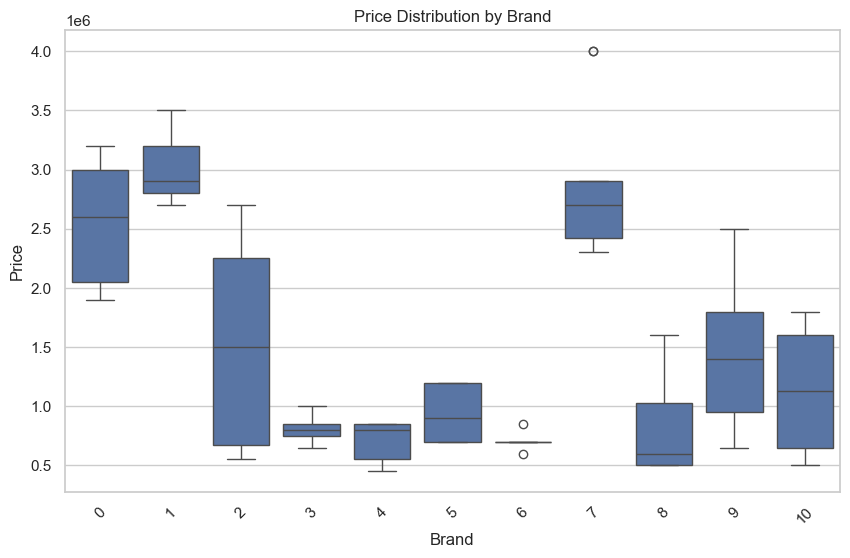

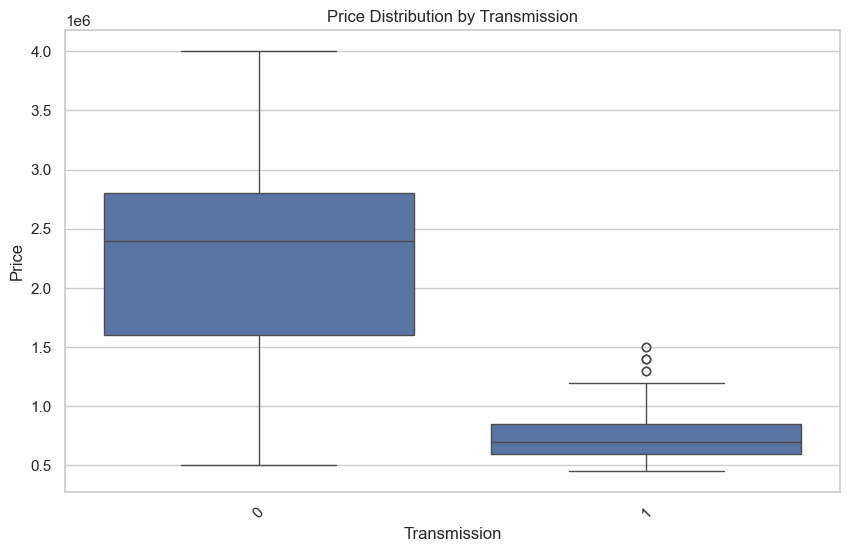

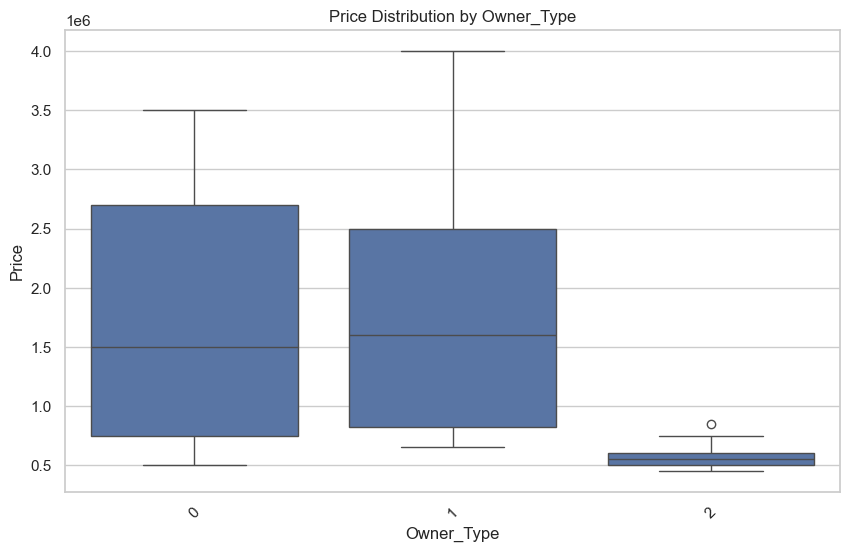

In [154]:


significant_features = ['Brand', 'Transmission', 'Owner_Type']

for feature in significant_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f"Price Distribution by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()


In [157]:
# Dropping irrelevant columns
df = df.drop(columns=['Car_ID'])


In [159]:
# Checking for missing values
print(df.isnull().sum())


Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
dtype: int64


In [161]:
# Dropping the 'Year' column as it's now redundant
df = df.drop(columns=['Year'])


## Scaling

---

### Types of Scaling and When to Use Them

#### 1. **Standard Scaling (StandardScaler)**
   -  Scales data to have a mean of 0 and a standard deviation of 1.
   - **When to Use**:
     - When data is normally distributed or nearly so.
     - Works well for algorithms sensitive to feature magnitudes, such as:
       - Support Vector Machines (SVMs)
       - Logistic Regression
       - Principal Component Analysis (PCA)

---

#### 2. **Min-Max Scaling (MinMaxScaler)**
   -  Scales data to a fixed range, typically [0, 1].  
     Formula:
     
      $z = \frac{x - x_{{min}}}{x_{{max}} - x_{{min}}}$
     
   - **When to Use**:
     - When features have different ranges but are not normally distributed.
     - Works well for algorithms that rely on distance metrics, like:
       - k-Nearest Neighbors (k-NN)
       - Neural Networks
   - **Example**: Scaling age (0–100) and income (0–100,000) to a common range.

---

#### 3. **Robust Scaling (RobustScaler)**
   -  Scales data using the median and interquartile range (IQR), making it robust to outliers.  
     Formula:
     $
     z = \frac{x - \text{median}}{\text{IQR}}
     $
   - **When to Use**:
     - When data contains many outliers.
     - Works well for datasets where mean and standard deviation are skewed by extreme values.

---

#### 4. **MaxAbs Scaling (MaxAbsScaler)**
   - Scales data by dividing each value by the maximum absolute value of the feature, so values range from -1 to 1.
   - **When to Use**:
     - For sparse data (e.g., data with many zeros).
     - Ensures zero entries remain zero.

---

### How to choose the right scaler?
- Use **StandardScaler** for most machine learning models that assume Gaussian distributions or involve standard distance metrics.
- Use **MinMaxScaler** when you need all features in a common range, especially for algorithms like k-NN and neural networks.
- Use **RobustScaler** if your data has significant outliers that could distort mean-variance scaling.
- Use **MaxAbsScaler** for sparse datasets to preserve sparsity.


#### Steps taken:
1. **Numerical Features**:  
   The list `numerical_features` specifies which columns to scale:  
   `['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Car_Age']`.

2. **StandardScaler**:  
   - This scaler standardizes the features by **removing the mean** and **scaling to unit variance**.
   Formula:
    
     $
     z = \frac{x - \mu}{\sigma}
     $
     
     Where:
     - \(x\): Original value
     - $(\mu$): Mean of the feature
     - $(\sigma)$: Standard deviation of the feature

3. **Transformation**:  
   - `fit_transform` computes the mean and standard deviation for each feature and scales the data accordingly.
   - The scaled values will have:
     - A mean of approximately 0.
     - A standard deviation of 1.



In [163]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Car_Age']

# Applying StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [165]:
# Defining features (X) & target (y)
X = df.drop(columns=['Price'])
y = df['Price']


In [167]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Linear Regression 
#### What is Linear Regression?

Linear Regression is a simple and widely-used algorithm to model the relationship between a **dependent variable** (\(y\)) and one or more **independent variables** (\(X\)).

### Goal
Predict the value of $(y)$ based on $(X)$.

### Equation
$
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon
$

### Components
- **$(y)$**: Dependent variable (target/output).
- **$(X)$**: Independent variable(s) (features/predictors).
- **$(beta_0)$**: Intercept (value of $(y)$ when all $(X_i = 0)$).
- **$(beta_i)$**: Coefficients showing how much $(y)$ changes with $(X_i)$.
- **$(epsilon)$**: Error term (unexplained variation).


1. **Train the Model**:  
   - The model is trained on features like mileage, engine size, age, etc. ($(X_{\text{train}}$)) to predict the car's price ($(y_{\text{train}}$)).
   - It finds the best-fit line (or hyperplane) using the formula:  
     
    $
     \text{Price} = \beta_0 + \beta_1 \cdot \text{Mileage} + \beta_2 \cdot \text{Engine} + \ldots
     $

2. **Make Predictions**:  
   - After training, the model predicts car prices for both training and test datasets.

3. **Evaluate**:  
   - Metrics like **MAE**, **MSE**, and **$(R^2)$** are used to check accuracy:
     - MAE: Average error in price predictions.
     - MSE: Penalizes large errors more.
     - $(R^2)$: Measures how well features explain price variation.

---

### How it Predicts Second-Hand Car Prices

- **Features**: Inputs like mileage, engine power, car age, and seats are scaled and used as predictors.
- **Output**: The model predicts the price of a car based on these features.
- **Example**:
   - For a car with high mileage and old age, the model may predict a lower price.
   - For a newer car with a powerful engine, it might predict a higher price.

This approach works by finding patterns in historical data, learning how features influence prices, and applying that to new cars.

In [173]:

# Initializing Linear Regression
lr_model = LinearRegression()

# Fitting model to training data
lr_model.fit(X_train, y_train)

# Predicting on train & test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
# Evaluating model
lr_metrics = {
    'Model': 'Linear Regression',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
}

# Displaying metrics
print(lr_metrics)


{'Model': 'Linear Regression', 'Train MAE': 287821.26851781225, 'Test MAE': 367403.69163921836, 'Train MSE': 139121508798.39056, 'Test MSE': 218510222416.3317, 'Train R²': 0.8587858743775416, 'Test R²': 0.7328235955048827}


## Decision Tree Regressor 


#### **What is a Decision Tree Regressor?**
A **Decision Tree Regressor** is a machine learning model that uses a tree-like structure to make decisions. It splits the data into smaller subsets based on the values of the input features, with each split aiming to minimize the error in predicting the target variable.

#### **How the Decision Tree Works**:
- The tree makes decisions by recursively splitting the data based on feature values.
- Each **leaf node** of the tree represents a predicted value for the target variable.
- It uses criteria like **mean squared error (MSE)** to make splits, ensuring the predictions are as accurate as possible.

---

### Steps

1. **Initialize the Model**:  
   `DecisionTreeRegressor(random_state=42)` creates an instance of the Decision Tree Regressor with a fixed random seed for reproducibility.

2. **Fit the Model**:  
   `fit(X_train, y_train)` trains the model using the training dataset:
   - `X_train`: Features (input variables).
   - `y_train`: Target values (output variable).

3. **Make Predictions**:  
   - `y_train_pred = dt_model.predict(X_train)` predicts values on the training dataset.
   - `y_test_pred = dt_model.predict(X_test)` predicts values on the test dataset.

4. **Evaluate the Model**:  
   Several metrics are calculated to evaluate the model:
   - **MAE (Mean Absolute Error)**: The average of the absolute differences between actual and predicted values.
   - **MSE (Mean Squared Error)**: The average of squared differences between actual and predicted values.
   - **$(R^2)$ (R-squared)**: Measures how well the model explains the variation in the target variable.

5. **Print the Metrics**:  
   A dictionary `dt_metrics` is created to store the evaluation metrics, which are then printed.

---

### Model Performance Metrics

- **Train MAE and Test MAE**:  
  These show how well the model is performing on both the training and test datasets. Lower MAE values indicate better performance.

- **Train MSE and Test MSE**:  
  MSE penalizes larger errors more than MAE, which makes it sensitive to outliers. A lower MSE indicates a more accurate model.

- **Train $(R^2)$ and Test $(R^2)$**:  
  $(R^2)$ indicates the proportion of variance in the target variable that the model explains:
  - A value close to 1 means the model explains most of the variance.
  - A value of 0 means the model doesn’t explain any variance.

---


In [175]:
# Initializing Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fitting model
dt_model.fit(X_train, y_train)

# Predicting on train & test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
# Evaluating model
dt_metrics = {
    'Model': 'Decision Tree',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
}

# displaying metrics
print(dt_metrics)


{'Model': 'Decision Tree', 'Train MAE': 0.0, 'Test MAE': 222500.0, 'Train MSE': 0.0, 'Test MSE': 206375000000.0, 'Train R²': 1.0, 'Test R²': 0.747661551629272}


### Random Forest Regressor 



#### **What is a Random Forest Regressor?**
A **Random Forest** is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. It works by:
- Building many individual decision trees on random subsets of the data.
- Each tree makes its own predictions, and the final output is the average of all tree predictions.

#### **Why Random Forest?**
- Random Forest models are more robust and less prone to overfitting compared to a single decision tree.
- By aggregating the results of multiple trees, it reduces the variance and makes better predictions, especially for complex datasets.

---

### Steps

1. **Initialize the Model**:  
   `RandomForestRegressor(random_state=42, n_estimators=100)` creates an instance of the Random Forest Regressor:
   - `random_state=42`: Ensures reproducibility.
   - `n_estimators=100`: Specifies the number of trees in the forest (100 trees).

2. **Fit the Model**:  
   The model is trained using the training dataset:
   - `X_train`: Features (input variables).
   - `y_train`: Target values (output variable).

3. **Make Predictions**:  
   - `y_train_pred = rf_model.predict(X_train)` predicts the target values on the training dataset.
   - `y_test_pred = rf_model.predict(X_test)` predicts the target values on the test dataset.

4. **Evaluate the Model**:  
   Evaluation metrics are calculated to check the model’s performance:
   - **MAE (Mean Absolute Error)**: Average absolute error between predicted and actual values.
   - **MSE (Mean Squared Error)**: Average squared error between predicted and actual values.
   - **$(R^2)$ (R-squared)**: Measures how well the model explains the variance in the target variable.


---

### Model Performance Metrics

- **Train MAE and Test MAE**:  
  These show the average absolute errors in predictions for both training and test datasets. Lower values indicate better accuracy.

- **Train MSE and Test MSE**:  
  MSE penalizes larger errors more than MAE. Lower MSE values indicate better performance.

- **Train $(R^2)$ and Test $(R^2)$**:  
  $(R^2)$ measures how well the model fits the data:
  - A value close to 1 means the model explains most of the variance in the target variable.
  - A value of 0 means the model explains none of the variance.

---


In [267]:

# Initializing Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fitting model
rf_model.fit(X_train, y_train)

# Predicting on train & test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluating the model
rf_metrics = {
    'Model': 'Random Forest',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
}

# displaying metrics
print(rf_metrics)


{'Model': 'Random Forest', 'Train MAE': 53250.0, 'Test MAE': 195725.0, 'Train MSE': 7759281250.0, 'Test MSE': 143263237500.0, 'Train R²': 0.9921240063693864, 'Test R²': 0.8248294461086996}


### **XGBRegressor**
XGBRegressor is a machine learning model from the XGBoost library designed for regression tasks. It uses **gradient boosting** on decision trees to make accurate predictions. It builds multiple decision trees sequentially, where each tree corrects the errors of the previous ones, optimizing the overall model.

---

#### **XGBRegressor for Predicting Second-Hand Car Prices?**
Predicting second-hand car prices involves analyzing various features like the car’s age, mileage, brand, condition, fuel type, etc. XGBRegressor is an excellent choice because:  
1. **Handles Complex Data Relationships:** It can capture non-linear relationships between car features and prices.  
2. **Feature Importance:** Automatically identifies which features (like mileage or age) are most critical.  
3. **Resistant to Overfitting:** With proper hyperparameter tuning, XGBoost reduces overfitting.  
4. **Scalability:** It handles large datasets efficiently, making it suitable for a wide variety of car listings.

---

### **Steps for Predicting Car Prices**  
1. **Training the Model:** The XGBRegressor is trained on historical data of car prices (`X_train` and `y_train`), learning the patterns between features (like mileage, year) and the price.  
2. **Making Predictions:** Once trained, the model predicts prices for new or unseen cars (`X_test`), based on their features.  
3. **Evaluation:** Metrics like Mean Absolute Error (MAE) ensure the model provides accurate and reliable price predictions.

---


In [179]:
from xgboost import XGBRegressor

# Initializing XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Fitting model
xgb_model.fit(X_train, y_train)

# Predicting on train & test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluating model
xgb_metrics = {
    'Model': 'XGBoost',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
}

# Printing metrics
print(xgb_metrics)


{'Model': 'XGBoost', 'Train MAE': 0.312109375, 'Test MAE': 146846.3953125, 'Train MSE': 0.16614990234375, 'Test MSE': 87379929987.96802, 'Train R²': 1.0, 'Test R²': 0.8931589722633362}



### **Multiple Linear Regression (MLR)**

Multiple Linear Regression (MLR) is a statistical method used to model the relationship between one **dependent variable (target)** and two or more **independent variables (features)**. It assumes a linear relationship between the features and the target.

The equation for MLR is:  
$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon $

- \(y\): Dependent variable (e.g., house price).  
- \(x_1, x_2, \dots, x_n\): Independent variables (e.g., size, location, age of the house).  
- \(\beta_0\): Intercept (constant term).  
- \(\beta_1, \beta_2, \dots, \beta_n\): Coefficients for each feature, representing their impact on \(y\).  
- \(\epsilon\): Error term (captures noise or unexplained variance).

---

### **Steps**

1. **Model Initialization**  
   ```python
   mlr_model = LinearRegression()
   ```
   - `LinearRegression` is a model from `scikit-learn` used to implement MLR.  
   - It assumes a linear relationship between the input features (\(X\)) and the target ($(y)$).

---

2. **Fitting the Model**  
   ```python
   mlr_model.fit(X_train, y_train)
   ```
   - The model learns the best-fit line by calculating the optimal values for the coefficients $(\beta_1, \beta_2, \dots, \beta_n$) and the intercept $(\beta_0$) that minimize the difference between predicted and actual values (minimizing the residual sum of squares).

---

3. **Making Predictions**  
   ```python
   y_train_pred = mlr_model.predict(X_train)
   y_test_pred = mlr_model.predict(X_test)
   ```
   - `y_train_pred`: Predictions on the training data to check how well the model fits the data it has seen.  
   - `y_test_pred`: Predictions on unseen test data to evaluate the model's ability to generalize to new data.

---

4. **Evaluating the Model**  
   ```python
   mlr_metrics = {
       'Model': 'Multiple Linear Regression',
       'Train MAE': mean_absolute_error(y_train, y_train_pred),
       'Test MAE': mean_absolute_error(y_test, y_test_pred),
       'Train MSE': mean_squared_error(y_train, y_train_pred),
       'Test MSE': mean_squared_error(y_test, y_test_pred),
       'Train R²': r2_score(y_train, y_train_pred),
       'Test R²': r2_score(y_test, y_test_pred),
   }
   ```
   - **MAE (Mean Absolute Error):**  
     Measures the average absolute difference between predicted and actual values.  
     - Lower values indicate better predictions.  

   - **MSE (Mean Squared Error):**  
     Measures the average of squared differences between predicted and actual values.  
     - Penalizes larger errors more than MAE.

   - **R² (R-Squared):**  
     Explains how much of the variance in the dependent variable is explained by the independent variables.  
     - Values closer to 1 indicate a better fit.


---

In [183]:

# Initializing  Linear Regression model
mlr_model = LinearRegression()

# Fitting model on training data
mlr_model.fit(X_train, y_train)

# Predicting on both train & test data
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)
# Calculating metrics
mlr_metrics = {
    'Model': 'Multiple Linear Regression',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
}

# Printing results
print(mlr_metrics)


{'Model': 'Multiple Linear Regression', 'Train MAE': 287821.26851781225, 'Test MAE': 367403.69163921836, 'Train MSE': 139121508798.39056, 'Test MSE': 218510222416.3317, 'Train R²': 0.8587858743775416, 'Test R²': 0.7328235955048827}


In **Multiple Linear Regression (MLR)**, the goal is to understand how different independent variables (features) affect the dependent variable (target). The coefficients represent the relationship between each feature and the target, so extracting and displaying them is a crucial step in interpreting and evaluating the model.

**Understanding Feature Importance**
- Interpretability: Coefficients help us interpret the model by showing how much influence each feature has on the target. For example, in a house price prediction model, the coefficient of "Square Footage" may show how much the house price increases for each additional square foot.
- Positive and Negative Relationships:
--   A **positive coefficient** indicates that as the feature increases, the target increases (e.g., as "Size" increases, the price might increase).
--   A **negative coefficient** indicates that as the feature increases, the target decreases (e.g., as "Age" increases, the price might decrease).

**Understanding the Model's Assumptions**
MLR assumes that the relationships between features and the target are **linear**. Examining the coefficients helps validate whether the model is capturing the relationship as expected. If you find that some features have very high coefficients, this could indicate that the relationship might be more complex than linear, prompting a need to use more advanced models like polynomial regression or decision trees.

In [185]:
# Getting coefficients and feature names
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': mlr_model.coef_
})

# Displaying coefficients
print(coefficients.sort_values(by='Coefficient', ascending=False))


              Feature    Coefficient
8               Power  613673.652435
10            Car_Age   75468.208933
9               Seats   56847.237636
1               Model   -5762.387259
0               Brand  -25801.653704
5          Owner_Type  -54596.385477
7              Engine  -96787.092278
6             Mileage -103566.888672
2   Kilometers_Driven -133844.512588
3           Fuel_Type -468033.044728
4        Transmission -531671.386627


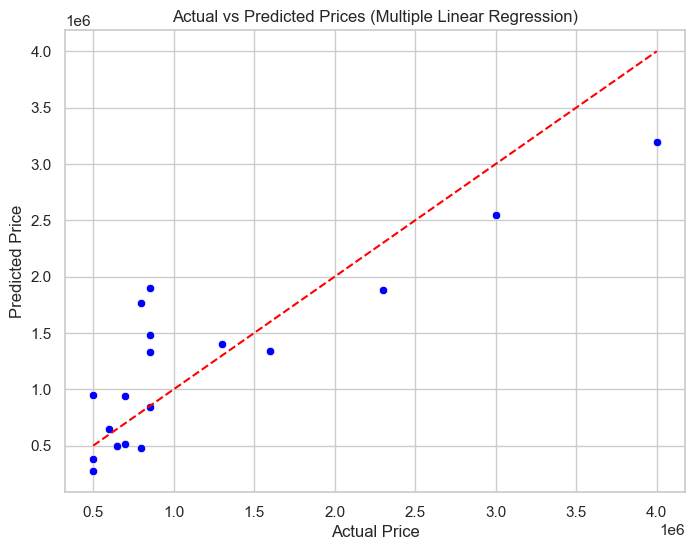

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for test predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Multiple Linear Regression)')
plt.show()


The residual distribution refers to the plot that shows how the residuals are spread out across the range of predicted values or independent variables. It visualizes the pattern and spread of errors made by the model.

Plotting the residual distribution is a crucial diagnostic tool in regression analysis. It allows us to:

- **Validate model assumptions** (e.g., homoscedasticity, normality).
- **Identify model weaknesses** (e.g., outliers, incorrect model form).
- **Improve model performance** by addressing any patterns or issues in the residuals.



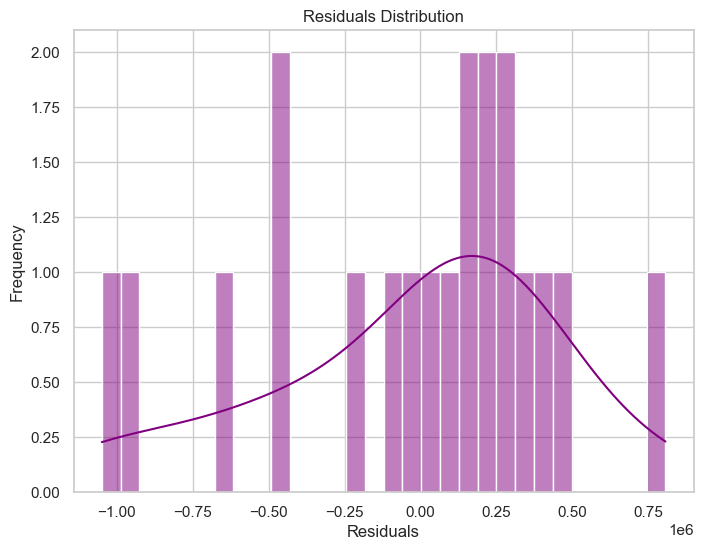

In [193]:
# Residuals: Actual - Predicted
residuals = y_test - y_test_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Concentration of Residuals:**

- The majority of the residuals are concentrated around 0, indicating that the model’s predictions are generally close to the actual values.

- This concentration suggests a good fit for most of the data points.

**Symmetry:**

- The distribution appears to be somewhat symmetrical around 0, which implies that the errors are evenly distributed and the model does not show a systematic bias in its predictions.

**Outliers:**

There are some residuals with extreme values (both negative and positive), indicating instances where the model significantly underestimates or overestimates the observed values.



- **XGBoost** is the clear winner, with the **lowest Test MAE** and the **highest Test R² (0.89)**, indicating it handles the complexity of the data well.
- **Random Forest** also performs well, offering a balance between simplicity and generalization.
- **Decision Tree** overfits, capturing noise in the training data.
- **Linear Regression** and **Multiple Linear Regression** perform decently but don't capture the non-linear relationships in the data.

## Hyperparameter Tuning

Hyperparameters are settings or configurations external to the model that control the learning process. They are set before training the model and cannot be learned from the data itself. For example, in decision trees, hyperparameters could include the maximum depth of the tree, minimum samples per leaf, and criterion for splitting nodes.
Hyperparameter tuning is the process of finding the best combination of these hyperparameters that results in the most accurate model. Since hyperparameters significantly impact the performance of the model, finding the optimal set is crucial to maximizing accuracy, reducing overfitting, and improving generalization to new data.


### **Methods for Hyperparameter Tuning**

1. **Grid Search**

Grid search is an exhaustive search method where you define a set of hyperparameters and specify a grid of possible values for each. The algorithm then evaluates all possible combinations of these hyperparameters to determine the best set.

**Working:**

- Define a list of values for each hyperparameter you want to tune.
- The grid search will try all possible combinations of these values.
- Evaluate each combination using cross-validation or a validation set.
- Select the combination that gives the best performance according to the evaluation metric (e.g., accuracy, F1 score).

**Advantages:**

- **Exhaustive:** It guarantees finding the best combination within the defined grid.

- **Simple to implement:** It’s straightforward and works well when the number of hyperparameters and values is small.


**Disadvantages:**

- **Computationally expensive:** It becomes slow and impractical when there are many hyperparameters or the possible values are vast, as it evaluates every combination.

- **Scalability:** For large datasets or many hyperparameters, grid search may be infeasible.

2. **Random Search** 

Random search, as the name suggests, randomly selects values from the given range of hyperparameters. Instead of trying every possible combination (like in grid search), it samples randomly from the defined hyperparameter space. This reduces the number of evaluations and can often lead to similar or better results than grid search, especially when there are many hyperparameters to tune.

**Working:** 

- Define a range of values for each hyperparameter.
- Randomly sample a specified number of combinations from the hyperparameter space.
- Evaluate each combination using cross-validation.
- Choose the combination that gives the best performance.

**Advantages:** 

- **Faster than grid search:**  Since it evaluates only a subset of the hyperparameter space, it is faster.

- **Can work well with large search spaces:**  Unlike grid search, random search can find good hyperparameter values without having to exhaustively search the entire space.

- **Less computationally expensive:**  It is less likely to try every possible combination, which makes it computationally efficient, especially for larger models.

**Disadvantages:** 

- **May miss the optimal combination:**  Since it doesn’t evaluate all possible combinations, random search might miss the best set of hyperparameters.

- **Less exhaustive:**  It’s not guaranteed to find the best solution, though it often does a good job with a reasonable number of iterations.

### Cross-Validation

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the data into multiple subsets and testing the model's performance on different parts of the data. It helps in evaluating how well the model generalizes to unseen data, thus preventing overfitting and providing a better estimate of its performance.

In cross-validation, the dataset is split into multiple folds (subsets), and the model is trained and validated multiple times, each time using a different subset for validation and the remaining data for training. The results from these different runs are then averaged to give a final performance metric.

**K-Fold Cross-Validation:**

In K-Fold Cross-Validation, the dataset is divided into K equal parts (or folds). The model is trained and tested K times, each time using a different fold as the test set and the remaining K-1 folds as the training set.

The final performance score is typically the average of the scores from all K iterations.





In [196]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Initializing the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Defining the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Performing GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Evaluation metric
    verbose=2,
    n_jobs=-1
)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [198]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining the parameter distribution
param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300, 500],
    'subsample': np.linspace(0.7, 1.0, 4),
    'colsample_bytree': np.linspace(0.7, 1.0, 4),
    'min_child_weight': [1, 3, 5, 7]
}

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Displaying the best parameters
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1577777777777778, 'colsample_bytree': 0.9}



---

### **1. XGBRegressor Models:**
- **XGBRegressor** is a regression model based on **XGBoost** (Extreme Gradient Boosting), a powerful ensemble method that builds multiple decision trees sequentially and optimizes them to improve prediction accuracy.

**Two models are created**:
- **`xgb_grid_model`**: This model is created with hyperparameters that are manually chosen based on a **GridSearchCV** approach (a brute-force method where all possible combinations of hyperparameters are evaluated).
- **`xgb_random_model`**: This model is created with hyperparameters optimized using **RandomizedSearchCV** (a more efficient method that randomly samples from a range of hyperparameters).

### **2. Training the Models:**
```python
xgb_grid_model.fit(X_train, y_train)
xgb_random_model.fit(X_train, y_train)
```
- Both models are **trained** on the training data (`X_train` and `y_train`). During training, the models learn the relationship between the features and the target variable.

### **3. Evaluating the Models:**
The models are evaluated on the test set (`X_test`, `y_test`) using three different metrics:

#### **MAE (Mean Absolute Error):**
```python
mae = mean_absolute_error(y_test, y_test_pred)
```
- MAE measures the **average absolute difference** between the predicted values and the actual values. It gives an idea of how far off the predictions are from the actual values on average.
- Lower values of MAE indicate better performance.

#### **MSE (Mean Squared Error):**
```python
mse = mean_squared_error(y_test, y_test_pred)
```
- MSE measures the **average of the squared differences** between predicted and actual values. Since the errors are squared, MSE gives more weight to large errors, making it sensitive to outliers.
- Lower values of MSE indicate better performance.

#### **R² (R-squared):**
```python
r2 = r2_score(y_test, y_test_pred)
```
- R² measures the proportion of the variance in the dependent variable that is explained by the model. 
- R² values close to 1 indicate that the model fits the data well, while values close to 0 suggest that the model does not explain the data well.

---

### **Key Differences in Model Performance:**

#### **GridSearchCV Model:**
- **MAE**: 172250.28  
  The average absolute error is around 172,250, meaning on average the model's predictions are off by this much.
- **MSE**: 93,483,575,883.68  
  This is the squared average error, which penalizes larger errors more heavily.
- **R²**: 0.8857  
  The model explains **88.57%** of the variance in the target variable. This is a strong performance, indicating that the model is doing a good job.

#### **RandomizedSearchCV Model:**
- **MAE**: 139089.51  
  The MAE for the RandomizedSearchCV model is lower than that of GridSearchCV, indicating that the RandomizedSearchCV model is generally making better predictions on average.
- **MSE**: 81,426,867,517.06  
  This model has a lower MSE, meaning its larger errors are not as significant as those in the GridSearchCV model, and overall, it performs better in minimizing errors.
- **R²**: 0.9004  
  The RandomizedSearchCV model explains **90.04%** of the variance in the target variable, which is a higher value than the GridSearchCV model, indicating even better performance.

### **Why RandomizedSearchCV Model Performs Better:**
- **Hyperparameter Tuning**: 
  - **GridSearchCV** evaluates all possible combinations of hyperparameters in a grid, which can be computationally expensive and time-consuming, especially when the grid is large. Although it’s exhaustive, it might miss better combinations if the grid search is not large enough.
  - **RandomizedSearchCV**, on the other hand, randomly samples hyperparameters from a specified distribution, which can be more efficient and lead to finding a better model, even though it is not exhaustive.
- **Efficiency**: RandomizedSearchCV tends to find a good combination of hyperparameters more quickly, while GridSearchCV might miss better combinations due to the limits of its search space or the computational cost.

### **Conclusion:**
- The **RandomizedSearchCV** model outperforms the **GridSearchCV** model, as it has a lower **MAE**, **MSE**, and a higher **R²**, indicating it is making better predictions and generalizing better to new data.
- Even though GridSearchCV might provide a more thorough search, RandomizedSearchCV is generally faster and can find optimal hyperparameters that lead to better performance in fewer iterations.



In [200]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training the GridSearchCV model
xgb_grid_model = XGBRegressor(
    colsample_bytree=0.8, 
    learning_rate=0.05, 
    max_depth=7, 
    min_child_weight=3, 
    n_estimators=100, 
    subsample=0.8, 
    random_state=42
)
xgb_grid_model.fit(X_train, y_train)

# Training the RandomizedSearchCV model
xgb_random_model = XGBRegressor(
    colsample_bytree=0.9, 
    learning_rate=0.1578, 
    max_depth=3, 
    min_child_weight=5, 
    n_estimators=200, 
    subsample=0.8, 
    random_state=42
)
xgb_random_model.fit(X_train, y_train)

# Evaluating both models on the test set
for model, name in zip([xgb_grid_model, xgb_random_model], ["GridSearchCV", "RandomizedSearchCV"]):
    y_test_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"{name} Model - MAE: {mae}, MSE: {mse}, R²: {r2}")


GridSearchCV Model - MAE: 172250.2765625, MSE: 93483575883.68423, R²: 0.8856959342956543
RandomizedSearchCV Model - MAE: 139089.5125, MSE: 81426867517.06436, R²: 0.9004378914833069


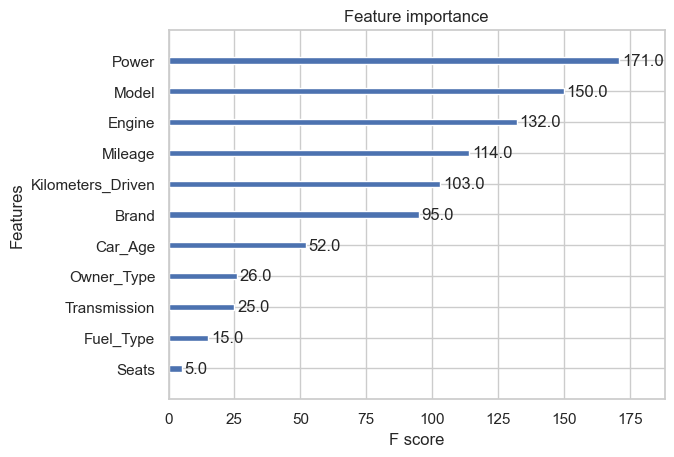

In [202]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plotting feature importance for RandomizedSearchCV model
plot_importance(xgb_random_model)
plt.show()


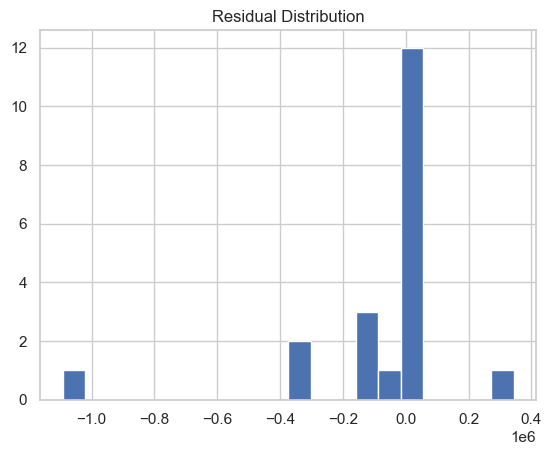

In [204]:
residuals = y_test - xgb_random_model.predict(X_test)
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()


The residual distribution suggests that the model is performing well for the majority of the data points, with some instances of larger prediction errors. Monitoring and addressing these outliers could further improve model accuracy.

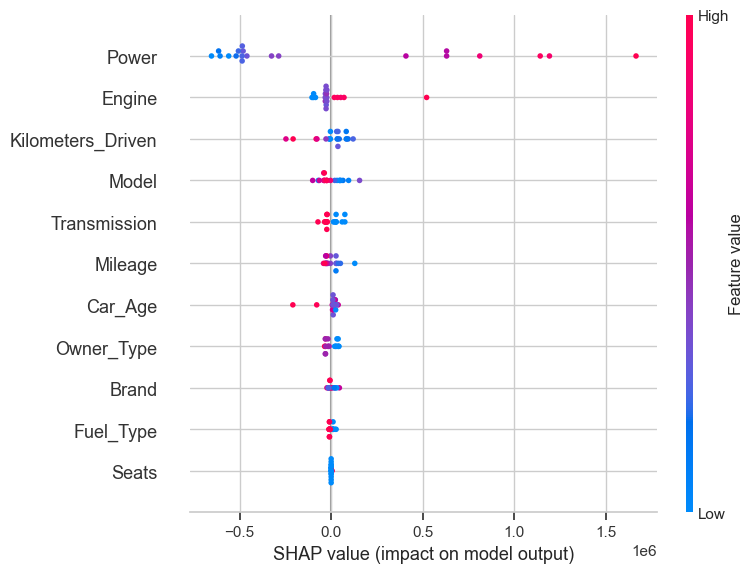

In [211]:
import shap

explainer = shap.Explainer(xgb_random_model, X_test)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


The SHAP summary plot provides valuable insights into feature importance and their impact on the model’s predictions. Key features like Power, Engine, and Kilometers_Driven play a significant role, while features like Seats and Fuel_Type have a lesser impact. This understanding helps in refining the model and focusing on the most influential features.

## Deployment
Deploying a machine learning model involves taking the trained model and making it available for use in a real-world application, whether it's through an API, a web application, or embedded in a device.

In [301]:
import pickle

# Saving the trained model to a file
with open("secondhandcarpriceprediction.pkl", "wb") as f:
    pickle.dump(xgb_random_model, f)
